In [1]:
#Checking the Python version
import sys
print(sys.version)

3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]


**The following are the various steps involved in solving this business problem:**

    1.	Obtain/Load the data needed for the analysis.

    2.  Data-wrangling (detecting outliers, treating missing values, transforming variables, etc.) and explore 
        the data to become familiar with it.

    3.	Exploratory Data Analysis (EDA) to answer some business questions

    4.  Modeling: After data preparation, start running the model, analyze the result and tweak the approach. 
        This is an iterative step until the best possible outcome is achieved.

    5.	Validate the models.

    6.  Report Performance: Interpret findings.

# STEP 1: Obtain/Load The Data Provided for The Analysis

To begin the analysis, I will need to install and import the relevant Python packages and libraries. For example, the functions pd.read_csv() and pd.read_excel() require the Python pandas library to be imported. The pd.read_csv() function is used to load a CSV (comma-separated values) file, and the pd.read_excel() function is used to load excel files.

In [2]:
#Importing modules 
import os
import scipy
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

#Data display coustomization
sns.set(style="white")
plt.rc("font", size=14)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
sns.set(style="whitegrid", color_codes=True)

# Load all input data and check sizes of the datasets
df_orders = pd.read_csv('./jiffyshirts/orders.csv', parse_dates = ["order_timestamp"], date_parser = pd.Timestamp)
df_customers = pd.read_csv('./jiffyshirts/customers.csv')
df_line_items = pd.read_csv('./jiffyshirts/line_items.csv')
print("The orders dataset has the following shape: {}.".format(df_orders.shape))
print("The customers dataset has the following shape: {}.".format(df_customers.shape))
print("The line items dataset has the following shape: {}.".format(df_line_items.shape))

The orders dataset has the following shape: (46433, 8).
The customers dataset has the following shape: (10000, 5).
The line items dataset has the following shape: (373878, 8).


# STEP 2:  Data Wrangling

In [3]:
#View few rows of the orders
df_orders.head(3)

,order_id,customer_uid,order_timestamp,discount,ship_state,shipping_revenue,shipping_cost,returned
0,38831,a6730d49e0989b2cc0158c6182fafb93,2015-11-30 05:03:15.159,0.0,FL,0.00,6.8,False
1,45499,ae2e8c1fa5326e1f793d4c02f720156c,2015-11-30 19:52:10.830,0.0,TN,5.95,6.8,True
2,69415,ba200839cd304b8342f8c5d0eb4d7c75,2015-12-02 22:54:40.380,0.0,TN,0.00,6.8,False


**Missing values and duplicates**

The first thing to do is to check if the dataset contains missing/null values and/or duplicated rows.

In [4]:
#Check total count of missing values in each column (orders table)
df_orders.isnull().sum()

order_id            0
customer_uid        0
order_timestamp     0
discount            0
ship_state          0
shipping_revenue    0
shipping_cost       0
returned            0
dtype: int64

In [5]:
#Check data properties of orders data
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46433 entries, 0 to 46432
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          46433 non-null  int64         
 1   customer_uid      46433 non-null  object        
 2   order_timestamp   46433 non-null  datetime64[ns]
 3   discount          46433 non-null  float64       
 4   ship_state        46433 non-null  object        
 5   shipping_revenue  46433 non-null  float64       
 6   shipping_cost     46433 non-null  float64       
 7   returned          46433 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 2.5+ MB


In [6]:
#order_id is the primary key customer_uid is the unique identifier for each customer
(df_orders.order_id.nunique(), df_orders.customer_uid.nunique())

(46433, 8457)

In [7]:
#View few rows of the customers table
df_customers.head()

,customer_uid,is_business,has_account,bill_state,acquisition_channel
0,7d30104b82c22393003ac3c07b491c15,False,False,OK,coupon aggregator
1,77a48e4c4a69458d3421c54058350f93,False,False,CA,organic search
2,c9fe0dadc9e25ab478144bbd3a0ae750,False,False,WA,organic search
3,7a8bdb597d753c6c7430ea4e1d52fc48,False,False,TX,organic search
4,becb1413c375caba8707085efaac08e9,False,False,IL,organic search


In [8]:
#We have over 8k unique customers in orders data with all their info in the customers table
(df_customers.customer_uid.nunique(), df_customers.shape, \
 df_customers.acquisition_channel.nunique(),df_customers.bill_state.nunique())

(10000, (10000, 5), 6, 54)

It is necessary to investigate the bill_state column further to determine why there are 54 rather than the maximum 50 states in the USA.

In [9]:
#Check missing values in the customers table
df_customers.isnull().sum()

customer_uid           0
is_business            0
has_account            0
bill_state             6
acquisition_channel    0
dtype: int64

In [10]:
df_line_items.head()

,line_item_id,order_id,quantity,selling_price,supplier_cost,product_category,color,size
0,1073625002,31323782,1,9.25,4.37,OTHER,BLACK,2XL
1,8055020046,22921936,1,9.25,4.37,OTHER,BLACK,2XL
2,5008546658,4435273,1,9.25,4.37,OTHER,BLACK,2XL
3,1013699827,6843815,1,9.25,4.37,OTHER,BLACK,2XL
4,1022146551,9923010,1,9.25,4.37,OTHER,RED,2XL


In [11]:
#Check missing values in the line items table
df_line_items.isnull().sum()

line_item_id         0
order_id             0
quantity             0
selling_price       22
supplier_cost       20
product_category     0
color                0
size                 0
dtype: int64

In [12]:
# Check for percentage of missing values
missingValues_percentage_line_items = round(100*(df_line_items.isnull().sum()/len(df_line_items.index)), 2)
missingValues_percentage_line_items

line_item_id        0.00
order_id            0.00
quantity            0.00
selling_price       0.01
supplier_cost       0.01
product_category    0.00
color               0.00
size                0.00
dtype: float64

In [13]:
line_items_df = df_line_items.copy()
mean_SP = round(line_items_df['selling_price'].mean(),2)
mean_SC = round(line_items_df['supplier_cost'].mean(),2)
(mean_SP, mean_SC)

(6.43, 3.59)

In [14]:
# Fill missings values columns since they are less than 15% (Standard data mining procedure)
line_items_df['selling_price'] = line_items_df['selling_price'].fillna(mean_SP)
line_items_df['supplier_cost'] = line_items_df['supplier_cost'].fillna(mean_SC)

#Validate
# Confirm
line_items_df.isnull().sum()

line_item_id        0
order_id            0
quantity            0
selling_price       0
supplier_cost       0
product_category    0
color               0
size                0
dtype: int64

# STEPS 3: Exploratory Data Analysis (EDA) to Answer Some Business Questions

In [15]:
#Combine all three datasets
df_line_items_orders  = line_items_df.merge(df_orders, on = 'order_id')
df = df_line_items_orders.merge(df_customers, on=['customer_uid'])

In [16]:
df.shape

(373878, 19)

## Business Question 1

In [17]:
#Customers that have indicated they are a business used the organic search and paid social acquisition channels. 
is_business_acquisition = df.groupby(['acquisition_channel', 'is_business']).size().reset_index().rename(columns={0: 'Count'})
is_business_acquisition

,acquisition_channel,is_business,Count
0,coupon aggregator,False,7365
1,direct,False,55877
2,organic search,False,5532
3,organic search,True,1856
4,paid search,False,50499
5,paid search,True,238910
6,paid social,False,4212
7,referral,False,9627


In [18]:
#Customers who have created user accounts with JiffyShirts.com do so through referral networks, direct, 
#organic search, sponsored search, coupon aggregators, and direct marketing acquisition channels.
has_account_acquisition = df.groupby(['acquisition_channel', 'has_account']).size().reset_index().rename(columns={0: 'Count'})
has_account_acquisition

,acquisition_channel,has_account,Count
0,coupon aggregator,False,5470
1,coupon aggregator,True,1895
2,direct,False,14854
3,direct,True,41023
4,organic search,False,5663
5,organic search,True,1725
6,paid search,False,26706
7,paid search,True,262703
8,paid social,False,4212
9,referral,False,2628


## Business Question 2: Determine the ratios of returned with shipping

In [19]:
# For both of the returned items, the supplier price of the products (i.e., the amount paid by Jiffyshirts.com) 
#are nearly identical.
df_ret_shipping_cost = df.copy()
df_ret_shipping_cost.groupby('returned')['shipping_cost'].mean().reset_index()

,returned,shipping_cost
0,False,8.310032
1,True,8.487805


In [20]:
# check the ratio of returned with shipping_revenue, that is, the selling price of the product (customer pays this).
df_ret_shipping_revenue = df.copy()
df_ret_shipping_revenue.groupby('returned')['shipping_revenue'].mean().reset_index()

,returned,shipping_revenue
0,False,1.553903
1,True,0.903524


## Business Question 3: What state has the higest delivery cost?

In [21]:
#The state where consumers pay the highest delivery costs is Texas (TX).
bill_state_sr = df.groupby('bill_state')['shipping_revenue'].sum().reset_index().sort_values(by=['shipping_revenue'], ascending=[False])
bill_state_sr.head()

,bill_state,shipping_revenue
45,TX,81178.22
11,GA,41579.85
10,FL,31201.32
36,OH,28753.19
5,CA,27907.00


In [22]:
#Similarly, Texas (TX) is the state where Jiffyshirts.com pays the highest delivery expenses.
bill_state_shipping_cost = df.groupby('bill_state')['shipping_cost'].sum().reset_index().sort_values(by=['shipping_cost'], ascending=[False])
bill_state_shipping_cost.head()

,bill_state,shipping_cost
45,TX,408071.30
11,GA,208852.37
36,OH,193451.78
10,FL,178054.28
5,CA,170129.37


## Business Question 4: What customer bought the most items overall?

In [23]:
user_count = df.groupby(['customer_uid']).size().reset_index().rename(columns={0: 'Count'})
user_count.sort_values(by='Count', ascending=False).head()

,customer_uid,Count
5820,b029deb6bd4492b0064103c994fe4f58,4177
1612,3069349651afb03593af7d090535f5dc,4176
2959,5945fa89273681f4790b9c934540e898,3545
4737,8f027f83d638ebf16d9b06493d78c0eb,3008
3349,64f9abc25d599e49cfddeb3de7774ca0,2974


## Business Question 5: What customer bought the most items by category?

In [24]:
user_item_count = df.groupby(['customer_uid','product_category'])['order_id'].count().reset_index().sort_values(by=['order_id'], ascending=[False])
user_item_count.head()

,customer_uid,product_category,order_id
11650,b029deb6bd4492b0064103c994fe4f58,OTHER,2990
5896,5945fa89273681f4790b9c934540e898,Fashion Tee,2669
3213,3069349651afb03593af7d090535f5dc,Basic Tee,2307
15343,e84d02e11507191e7ad6ff454d506366,Fashion Tee,2271
2962,2c7f071699fe47c7853be51ff1031881,Fashion Tee,1880


## Visual exploration

Check out/visualize the features statistics with boxplot and histogram. This analysis will help to understand the properties of each of the variables in terms of the present of outliers, visual descriptive statistics, skewed or normal distribution, etc.

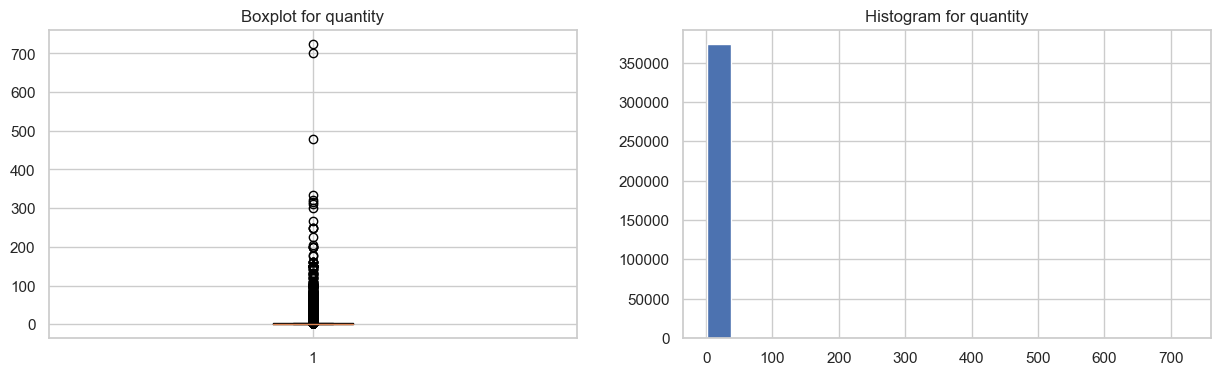

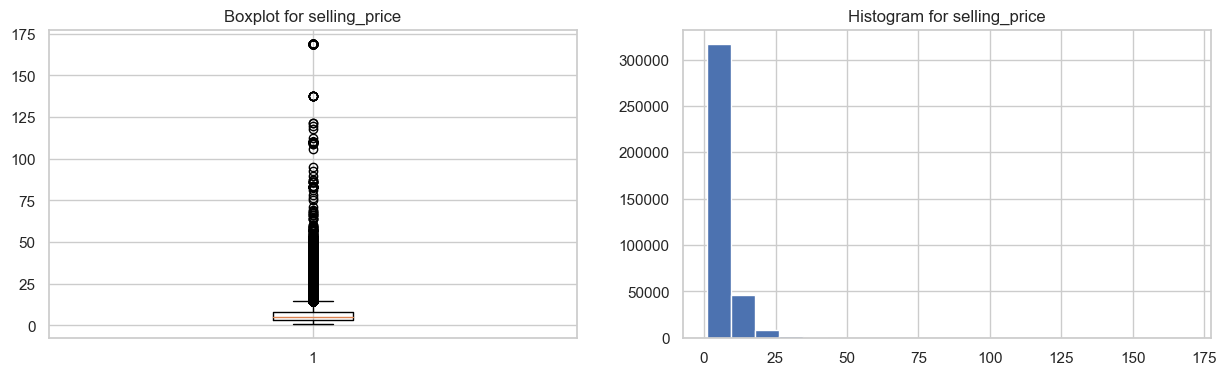

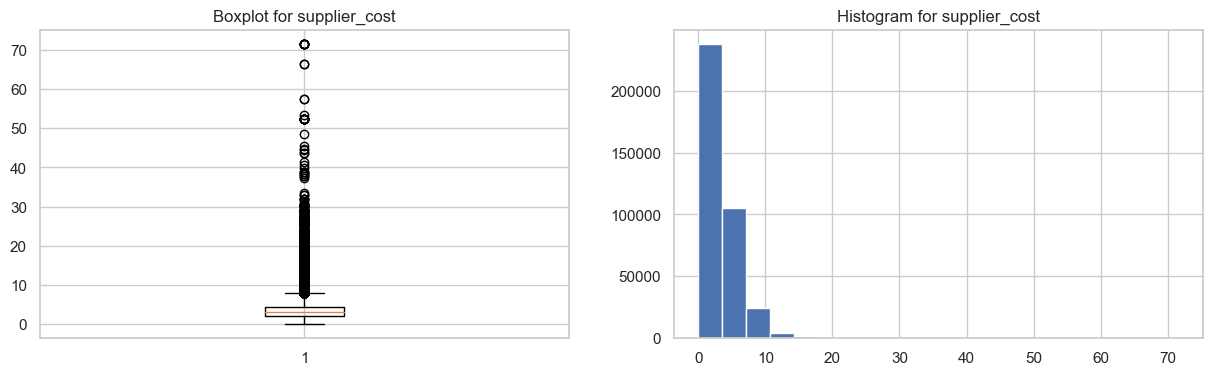

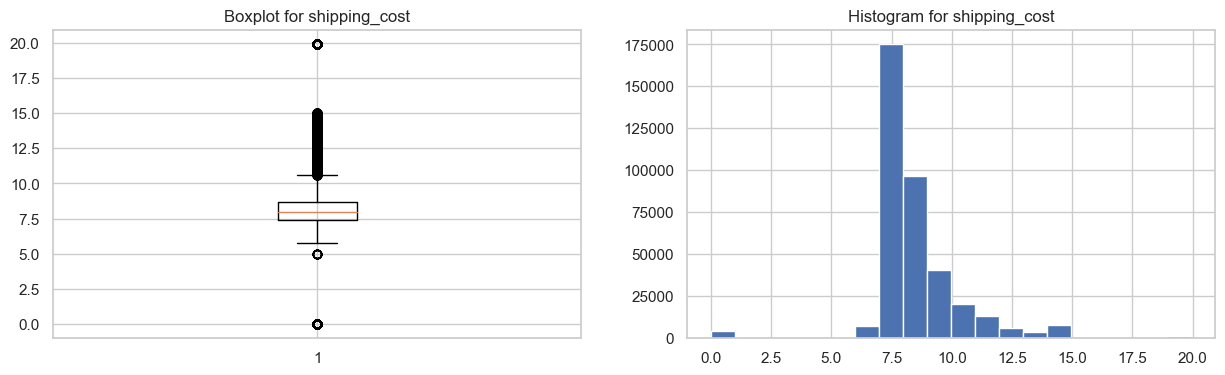

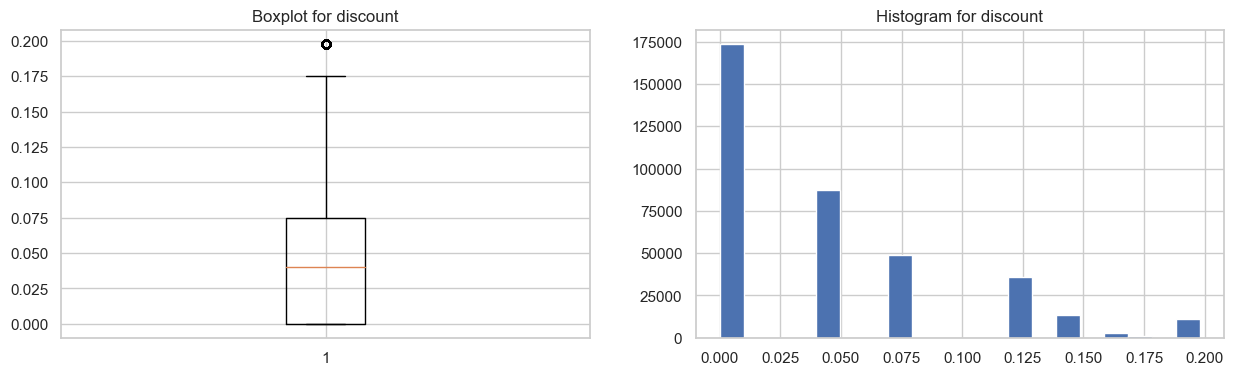

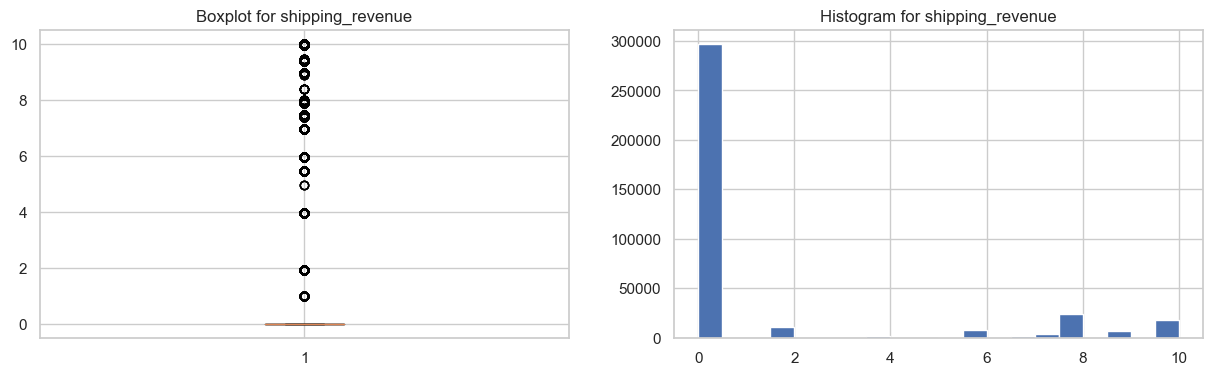

In [25]:
df_copy = df.copy()
for feature in ['quantity','selling_price','supplier_cost','shipping_cost','discount','shipping_revenue']:

    # Creating an empty chart
    fig, ((ax1, ax2)) = plt.subplots(1, 2,  figsize=(15, 4))

    # Extracting the feature values
    x = df_copy[feature].values

    # Boxplot
    ax1.boxplot(x)
    ax1.set_title( 'Boxplot for {}'.format(feature) )

    # Histogram
    ax2.hist(x, bins=20)
    ax2.set_title( 'Histogram for {}'.format(feature) )

    # Display
    plt.show()

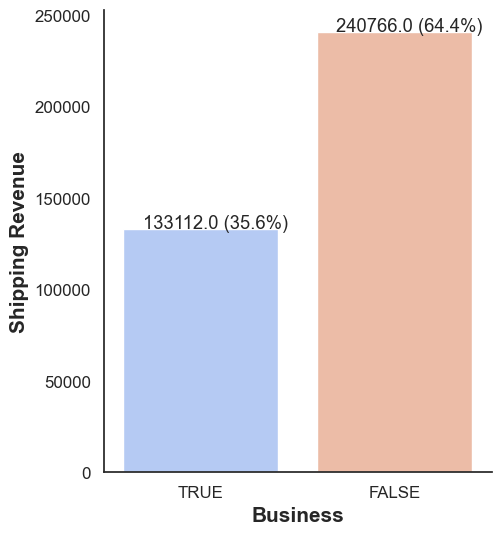

In [26]:
sns.set(style='white',font_scale=1.1)
fig = plt.figure(figsize=[5,6])
ax = sns.countplot(data=df,x='is_business',palette='coolwarm')
ax.set_xticklabels(['TRUE','FALSE'])
for p in ax.patches:
        ax.annotate(str(p.get_height())+' ('+str((p.get_height()/len(df)*100).round(1))+'%)', (p.get_x()+0.1, p.get_height()+400))
plt.xlabel('Business',weight='bold',fontsize='15')   
plt.ylabel('Shipping Revenue',weight='bold',fontsize='15')   
sns.despine()
plt.savefig('targetplot1.png',transparent=True, bbox_inches='tight')

The customers pay only 35.6% of shipping fees.

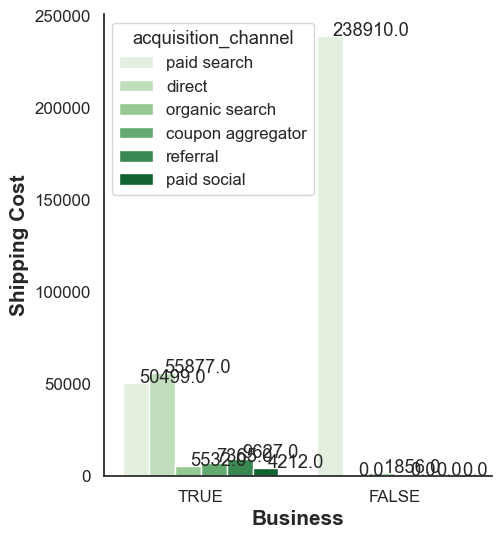

In [27]:
sns.set(style='white',font_scale=1.1)
fig = plt.figure(figsize=[5,6])
ax = sns.countplot(data=df,x='is_business',hue='acquisition_channel',palette='Greens')
ax.set_xticklabels(['TRUE','FALSE'])
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.08, p.get_height()+200))
plt.xlabel('Business',weight='bold',fontsize='15')   
plt.ylabel('Shipping Cost',weight='bold',fontsize='15')   
sns.despine()
plt.savefig('targetplot2.png',transparent=True, bbox_inches='tight')

Jiffyshirts.com spends more in the paid search acquisition channel when it comes to paying suppliers for the product's shipping costs.

# Feature Engineering

In [28]:
from sklearn.preprocessing import StandardScaler

df1 = df.copy()
# Standridze the Flight Distance variable
df1["quantity"] = StandardScaler().fit_transform(df1['quantity'].values.reshape(-1, 1))
df1["selling_price"] = StandardScaler().fit_transform(df1['selling_price'].values.reshape(-1, 1))
df1["supplier_cost"] = StandardScaler().fit_transform(df1['supplier_cost'].values.reshape(-1, 1))
df1["supplier_cost"] = StandardScaler().fit_transform(df1['supplier_cost'].values.reshape(-1, 1))

## Selecting Features Based on Correlation Method: Correlation Matrix and Heatmap

In [29]:
corr_matrix = df1.corr()
corr_matrix

,line_item_id,order_id,quantity,selling_price,supplier_cost,discount,shipping_revenue,shipping_cost,returned,is_business,has_account
line_item_id,1.000000,0.430097,0.007671,0.004923,0.002386,0.027649,0.089648,0.205148,-0.009596,-0.017638,0.050941
order_id,0.430097,1.000000,-0.024711,0.060733,0.083058,0.078935,0.147118,0.539622,0.007157,-0.030964,0.146574
quantity,0.007671,-0.024711,1.000000,-0.083423,-0.093396,0.199122,-0.083878,-0.030644,-0.011304,0.027337,-0.043865
selling_price,0.004923,0.060733,-0.083423,1.000000,0.852901,0.085079,-0.017343,0.038068,0.017127,-0.018322,-0.018098
supplier_cost,0.002386,0.083058,-0.093396,0.852901,1.000000,0.109108,-0.025022,0.054368,0.018205,-0.011081,-0.007227
discount,0.027649,0.078935,0.199122,0.085079,0.109108,1.000000,-0.276035,0.108840,0.055501,0.071360,0.053872
shipping_revenue,0.089648,0.147118,-0.083878,-0.017343,-0.025022,-0.276035,1.000000,0.054292,-0.056553,-0.073473,-0.060937
shipping_cost,0.205148,0.539622,-0.030644,0.038068,0.054368,0.108840,0.054292,1.000000,0.026244,-0.006303,0.119471
returned,-0.009596,0.007157,-0.011304,0.017127,0.018205,0.055501,-0.056553,0.026244,1.000000,0.052750,0.069876
is_business,-0.017638,-0.030964,0.027337,-0.018322,-0.011081,0.071360,-0.073473,-0.006303,0.052750,1.000000,0.263905


<AxesSubplot:>

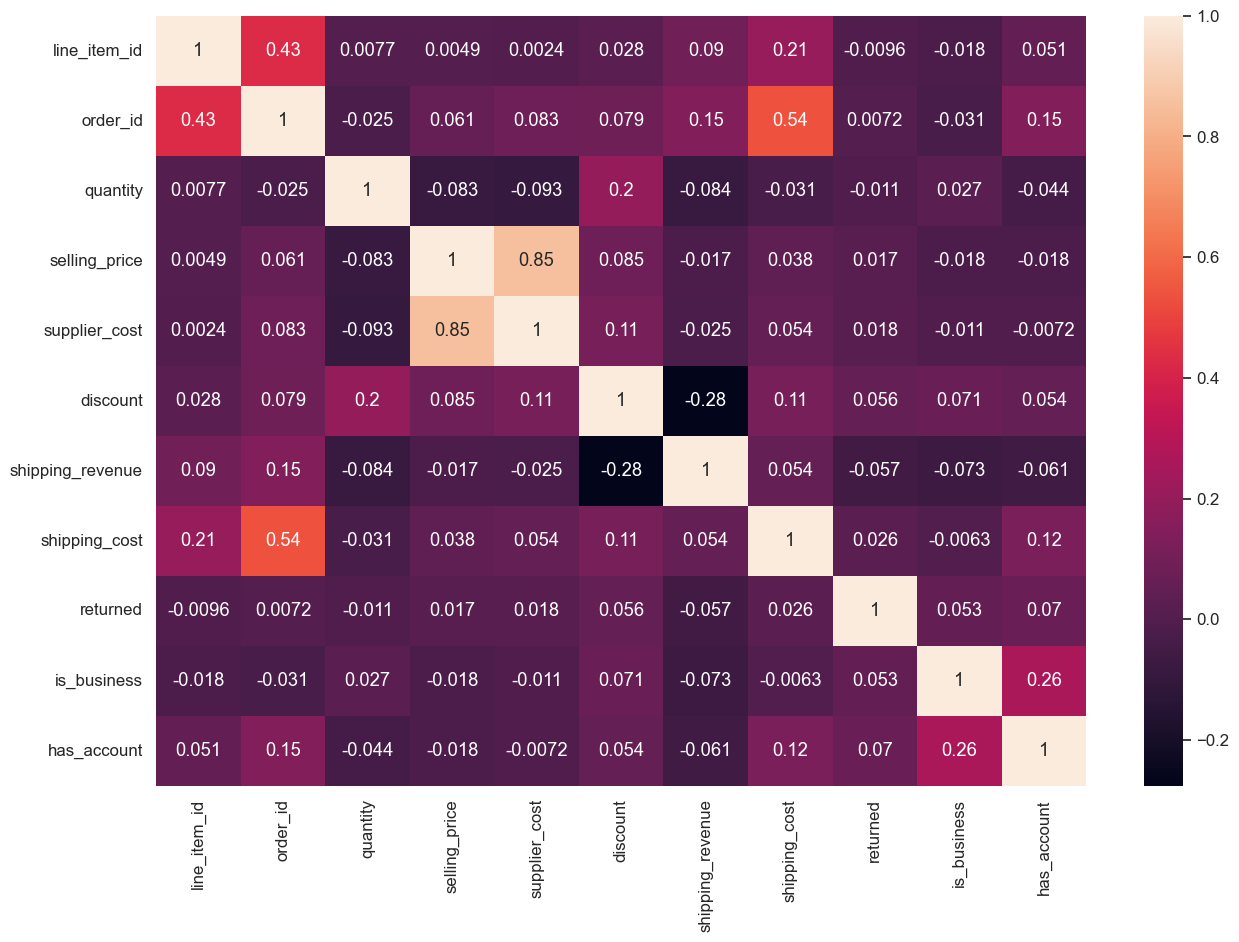

In [30]:
#check the correlation between variables
df_corr = df1.copy()
plt.figure(figsize=(15, 10))
sns.heatmap(df_corr.corr(), annot=True)

The correlation heatmap above demonstrates that correlations aren't particularly concerning.

### Multicollinearity

Use VIF (Variance Inflation Factors) technique to check the correlation among the independent variables.

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select the independent variables set
dataset = df1.copy()
X = dataset[['quantity', 'selling_price', 'supplier_cost', 
             'discount', 'shipping_revenue','shipping_cost' 
             ]]
  
# VIF dataframe
vif_x = pd.DataFrame()
vif_x["Feature"] = X.columns
  
#Calcule VIF for each feature
vif_x["VIF"] = [variance_inflation_factor(X.values, i)
                for i in range(len(X.columns))]
  
print(vif_x)

            Feature       VIF
0          quantity  1.059212
1     selling_price  3.669755
2     supplier_cost  3.696274
3          discount  1.919848
4  shipping_revenue  1.329674
5     shipping_cost  2.255882


The above output indicates that there is no multicollinearity issue among these numerical features (VIF<=5 or VIF<=10) 

**Note:**

Some papers argue that a VIF<10 is acceptable, but others says that the limit value is 5.

- "10" as the maximum level of VIF (Hair et al., 1995)
- "5" as the maximum level of VIF (Ringle et al., 2015)

Hair, J. F. Jr., Anderson, R. E., Tatham, R. L. & Black, W. C. (1995). Multivariate Data Analysis (3rd ed). New York: Macmillan.

Ringle, Christian M., Wende, Sven, & Becker, Jan-Michael. (2015). SmartPLS 3. Bönningstedt: SmartPLS. Retrieved from http://www.smartpls.com

# STEP 4: Build Models

    1. Product Recommendation

    2. Clustering

## Product Recomendation Model

In [47]:
#!pip install implicit
#!pip install openpyxl

In [37]:
import sys
import implicit
import numpy as np
import pandas as pd
import scipy.sparse as sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import spsolve
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import MinMaxScaler

In [45]:
#Make copy of the data
df_rec = df.copy()
df_rec = df_rec.applymap(lambda s:s.lower() if type(s) == str else s)

#Select needed features
df_rec = df_rec[['customer_uid','line_item_id','order_id','quantity','product_category']]
#Drop NaNs
df_rec = df_rec.dropna()
df1 = df_rec.copy()

df_grp = df1.rename(columns={'customer_uid': 'userID', 'order_id': 'orderId', 'product_category': 
                             'productCategory', 'quantity': 'Quantity'})

group = df_grp.groupby(['userID', 'orderId', 'productCategory'])
grp = group.aggregate({'Quantity':'sum'})
grp.reset_index(drop=False,inplace=True)
grp.dropna(inplace=True)

data = grp[['userID','productCategory','Quantity']]
data = data.groupby(['userID','productCategory']).agg(
    Count=pd.NamedAgg(column='Quantity', aggfunc='sum')   
)
data.reset_index(drop=False, inplace=True)

#MODELING
user_category = CategoricalDtype(sorted(data.userID.unique()), ordered=True)
item_category = CategoricalDtype(sorted(data.productCategory.unique()), ordered=True)

#Encode for modeling
row = data['userID'].astype(user_category).cat.codes
col = data['productCategory'].astype(item_category).cat.codes

#Transform two column raw data frame into item-item sparse matrix
sparse_matrix = csr_matrix((data['Count'], (row, col)),shape=(user_category.categories.size,item_category.categories.size))
sparse_df = pd.DataFrame.sparse.from_spmatrix(sparse_matrix,index=user_category.categories,columns=item_category.categories)

#Using sparse matrix create co-occurrence matrix
co_matrix = sparse_matrix.transpose().dot(sparse_matrix)
co_matrix.setdiag(0)
co_df = pd.DataFrame.sparse.from_spmatrix(co_matrix,
                               index=item_category.categories,
                               columns=item_category.categories)

#Filter out nonzero index in co-occurrence matrix
idx = pd.np.nonzero(co_matrix)

#Create subjects and peers list
rows = idx[0]
columns = idx[1]
subjects = [item_category.categories[i] for i in rows]
peers = [item_category.categories[i] for i in columns]

#Extract the co-occurrence counts for pair of parts
occur = co_matrix[idx].tolist()[0]

#Create final recommended dataframe
df_recommend = pd.DataFrame.from_records(zip(subjects, peers, occur),
                                         columns = ['PRODCATEGORY', 'RECOMMENDED', 'PCT_SCORE'])
result = df_recommend.groupby(['PRODCATEGORY','RECOMMENDED']).agg({'PCT_SCORE': 'sum'})
result = result.groupby(level=['PRODCATEGORY']).apply(lambda x: 100 * x / float(x.sum()))
result.reset_index(drop=False,inplace=True)
result['PCT_SCORE'] = round(result['PCT_SCORE']/1,1)

#Sorting results by scores in descending order
final_result  = result.sort_values(by=['PRODCATEGORY', 'PCT_SCORE'], ascending=[False, False])

import pickle
#Save result
final_result.to_excel("./jiffyshirts/recommender_excel.xlsx", index=False)
with open('./jiffyshirts/recommender_pkl', 'wb') as files: #create an iterator object with write permission - recommender_pkl
    pickle.dump(final_result, files)
    
#View few rows of the recommendation results
df_result = pd.read_pickle('./jiffyshirts/recommender_pkl')
df_result.head()

,PRODCATEGORY,RECOMMENDED,PCT_SCORE
17,tank top,fashion tee,46.0
16,tank top,basic tee,26.4
18,tank top,other,24.8
19,tank top,sweater,2.8
12,sweater,basic tee,51.8


In [46]:
top_prodCat_rec = df_result.groupby(['PRODCATEGORY','RECOMMENDED'])['PCT_SCORE'].max().reset_index().sort_values(by=['PCT_SCORE'], ascending=[False])
top_prodCat_rec.head()

,PRODCATEGORY,RECOMMENDED,PCT_SCORE
8,other,basic tee,61.6
1,basic tee,other,57.7
12,sweater,basic tee,51.8
4,fashion tee,basic tee,47.5
17,tank top,fashion tee,46.0


## Business Question 6: What product categories should we recommend to our top customers?

Basic tee, fashion tee, and other product categories can be recommended to Jiffyshirts.com top customers

## Clustering (Segmentation) Model

In [53]:
#!pip install kmodes
#!pip install lightgbm

In [ ]:
from sklearn.cluster import KMeans
from pandas.io.json import json_normalize
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import PowerTransformer

from lightgbm import LGBMClassifier
from sklearn.metrics import silhouette_score
from sklearn.model_selection import cross_val_score

In [56]:
import calendar
df2 = df.copy()
df2['Year'] = df2.order_timestamp.dt.year 
df2['Month'] = df2.order_timestamp.dt.month
df2['Month'] = df2['Month'].apply(lambda x: calendar.month_abbr[x])
df2['Day'] = df2.order_timestamp.dt.day
df2['Day_Of_Week'] = df2['order_timestamp'].dt.day_name()

In [57]:
df2.head()

,line_item_id,order_id,quantity,selling_price,supplier_cost,product_category,color,size,customer_uid,order_timestamp,discount,ship_state,shipping_revenue,shipping_cost,returned,is_business,has_account,bill_state,acquisition_channel,Year,Month,Day,Day_Of_Week
0,1073625002,31323782,1,9.25,4.37,OTHER,BLACK,2XL,2674197df180fdb59dfdaa65757e1f4c,2020-05-22 20:00:58.985,0.075,MI,9.95,8.52,False,True,True,MI,paid search,2020,May,22,Friday
1,1073625000,31323782,7,7.83,4.09,OTHER,BLACK,L,2674197df180fdb59dfdaa65757e1f4c,2020-05-22 20:00:58.985,0.075,MI,9.95,8.52,False,True,True,MI,paid search,2020,May,22,Friday
2,20073624392,31323782,1,10.20,5.09,OTHER,BLACK,OTHER,2674197df180fdb59dfdaa65757e1f4c,2020-05-22 20:00:58.985,0.075,MI,9.95,8.52,False,True,True,MI,paid search,2020,May,22,Friday
3,1073624999,31323782,2,7.83,4.09,OTHER,BLACK,M,2674197df180fdb59dfdaa65757e1f4c,2020-05-22 20:00:58.985,0.075,MI,9.95,8.52,False,True,True,MI,paid search,2020,May,22,Friday
4,20073624391,31323782,1,10.20,5.09,OTHER,BLACK,OTHER,2674197df180fdb59dfdaa65757e1f4c,2020-05-22 20:00:58.985,0.075,MI,9.95,8.52,False,True,True,MI,paid search,2020,May,22,Friday


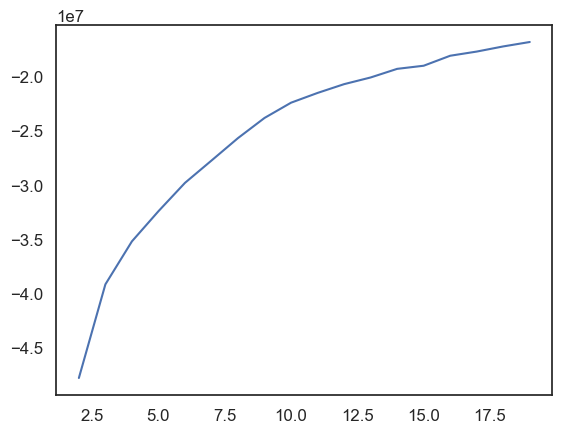

In [63]:
#Select features for clustering
cluster_data = df2[['product_category', 'color', 'size', 'Month', 'Day_Of_Week', 
                    'ship_state','quantity', 'selling_price', 'supplier_cost']]

#Categorical variable encoding
%run encoder.py
import pandas as pd
multi = MultiColumnLabelEncoder(columns=['product_category', 'color', 'size', 'Month', 'Day_Of_Week', 
                                         'ship_state'])
transform_data = multi.fit_transform(cluster_data)

# Elbow method in finding the optimal number of clueter 
n_cluster = range(2, 20)
kmeans = [KMeans(n_clusters=i).fit(transform_data) for i in n_cluster]
scores = [kmeans[i].score(transform_data) for i in range(len(kmeans))]
fig, ax = plt.subplots()
ax.plot(n_cluster, scores)
plt.show()

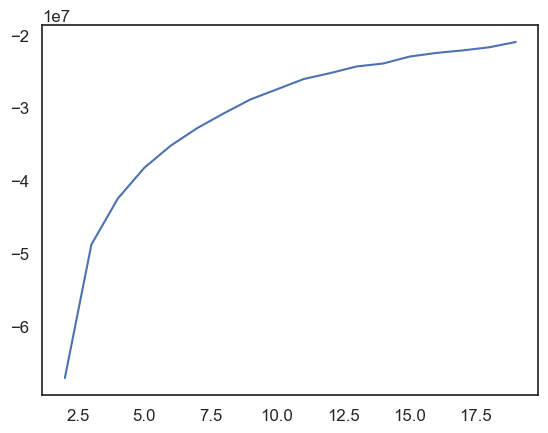

In [64]:
#Select features for clustering
cluster_data = df2[['bill_state', 'is_business', 'has_account', 'product_category', 'color', 'size', 'acquisition_channel',
                    'ship_state', 'Month', 'Day_Of_Week', 'quantity', 'selling_price', 'supplier_cost']]

#Categorical variable encoding
%run encoder.py
import pandas as pd
multi = MultiColumnLabelEncoder(columns=['bill_state', 'is_business', 'has_account', 'product_category', 'color', 
                                         'size', 'acquisition_channel','ship_state', 'Month', 'Day_Of_Week'])
transform_data = multi.fit_transform(cluster_data)

# Elbow method in finding the optimal number of clueter 
n_cluster = range(2, 20)
kmeans = [KMeans(n_clusters=i).fit(transform_data) for i in n_cluster]
scores = [kmeans[i].score(transform_data) for i in range(len(kmeans))]
fig, ax = plt.subplots()
ax.plot(n_cluster, scores)
plt.show()

In [ ]:
cost = []
for num_clusters in list(range(2, 20)):
    kproto = KPrototypes(n_clusters = num_clusters, init='Cao')
    kproto.fit_predict(transform_data, categorical=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    cost.append(kproto.cost_)

plt.plot(cost)

In [ ]:
#Checking whether data can be clustered
%run hopkins_stats
Num_features = transform_data.select_dtypes(include=[np.number]).columns
hopkins(transform_data[Num_features])

In [66]:
kprot_cluster = cluster_data.copy()
kprot_cluster = kprot_cluster.dropna()

#Data Pre-processing
for c in kprot_cluster.select_dtypes(exclude='object').columns:
    pt = PowerTransformer()
    kprot_cluster[c] =  pt.fit_transform(np.array(kprot_cluster[c]).reshape(-1, 1))

categorical_columns = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 

#Actual clustering
kproto_rs = KPrototypes(n_clusters = 3, init='Huang', n_jobs = 4, random_state=42)
result_clusters = kproto_rs.fit_predict(kprot_cluster, categorical=categorical_columns)
kprot_cluster['cluster'] = result_clusters

In [67]:
#Cluster segments predictions output 
kprot_cluster.head()

,bill_state,is_business,has_account,product_category,color,size,acquisition_channel,ship_state,Month,Day_Of_Week,quantity,selling_price,supplier_cost,cluster
0,MI,0.743529,0.435175,OTHER,BLACK,2XL,paid search,MI,May,Friday,-0.779526,1.014833,0.770731,2
1,MI,0.743529,0.435175,OTHER,BLACK,L,paid search,MI,May,Friday,1.772418,0.762459,0.656260,0
2,MI,0.743529,0.435175,OTHER,BLACK,OTHER,paid search,MI,May,Friday,-0.779526,1.154409,1.020088,2
3,MI,0.743529,0.435175,OTHER,BLACK,M,paid search,MI,May,Friday,0.773705,0.762459,0.656260,2
4,MI,0.743529,0.435175,OTHER,BLACK,OTHER,paid search,MI,May,Friday,-0.779526,1.154409,1.020088,2


In [78]:
# Calculate mean values for the clusters
segm_analysis_mean = kprot_cluster.groupby(['cluster']).mean()
segm_analysis_mean.head()

,is_business,has_account,quantity,selling_price,supplier_cost
cluster,,,,,
0,0.044694,-0.065246,1.244968,-0.705985,-0.686913
1,-0.005167,0.080935,-0.779526,-0.536081,-0.556794
2,-0.030419,-0.021348,-0.277880,1.033941,1.037543


In [79]:
# Add the segment labels to our table
segm_analysis_mean['Labels'] = kprot_cluster['cluster'].map({0:'well-off', 
                                                             1:'fewer opportunities',
                                                             2:'standard'})

In [80]:
segm_analysis_mean.head()

,is_business,has_account,quantity,selling_price,supplier_cost,Labels
cluster,,,,,,
0,0.044694,-0.065246,1.244968,-0.705985,-0.686913,standard
1,-0.005167,0.080935,-0.779526,-0.536081,-0.556794,well-off
2,-0.030419,-0.021348,-0.277880,1.033941,1.037543,standard


In [71]:
result_kprot_cluster = df.copy()
result_kprot_cluster = result_kprot_cluster.dropna()
result_kprot_cluster['cluster_segment'] = result_clusters

In [72]:
result_kprot_cluster.head()

,line_item_id,order_id,quantity,selling_price,supplier_cost,product_category,color,size,customer_uid,order_timestamp,discount,ship_state,shipping_revenue,shipping_cost,returned,is_business,has_account,bill_state,acquisition_channel,cluster_segment
0,1073625002,31323782,1,9.25,4.37,OTHER,BLACK,2XL,2674197df180fdb59dfdaa65757e1f4c,2020-05-22 20:00:58.985,0.075,MI,9.95,8.52,False,True,True,MI,paid search,2
1,1073625000,31323782,7,7.83,4.09,OTHER,BLACK,L,2674197df180fdb59dfdaa65757e1f4c,2020-05-22 20:00:58.985,0.075,MI,9.95,8.52,False,True,True,MI,paid search,0
2,20073624392,31323782,1,10.20,5.09,OTHER,BLACK,OTHER,2674197df180fdb59dfdaa65757e1f4c,2020-05-22 20:00:58.985,0.075,MI,9.95,8.52,False,True,True,MI,paid search,2
3,1073624999,31323782,2,7.83,4.09,OTHER,BLACK,M,2674197df180fdb59dfdaa65757e1f4c,2020-05-22 20:00:58.985,0.075,MI,9.95,8.52,False,True,True,MI,paid search,2
4,20073624391,31323782,1,10.20,5.09,OTHER,BLACK,OTHER,2674197df180fdb59dfdaa65757e1f4c,2020-05-22 20:00:58.985,0.075,MI,9.95,8.52,False,True,True,MI,paid search,2


In [74]:
#Save result to local environ.
#kprot_cluster.to_csv('./jiffyshirts/Clustering_results.csv', index = False)
result_kprot_cluster.to_csv('./jiffyshirts/Clustering_results.csv', index = False)

# Model Evaluation

In [77]:
proto_clusters = kproto_rs.labels_

cluster_data2 = cluster_data.dropna()
#Setting the objects to category 
lgbm_data = cluster_data2.copy()
for c in lgbm_data.select_dtypes(include='object'):
    lgbm_data[c] = lgbm_data[c].astype('category')

clf_kp = LGBMClassifier(colsample_by_tree=0.8)
cv_scores_kp = cross_val_score(clf_kp, lgbm_data, proto_clusters, scoring='f1_weighted')
print(f'CV F1 score for K-Prototypes clusters is {np.mean(cv_scores_kp)}')

[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
CV F1 score for K-Prototypes clusters is 0.9988497646209137


In [90]:
#print(f'Silhouette Score for KPrototypes (n=4): {silhouette_score(transform_data, result_clusters)}')